In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [2]:
dataset = pd.read_csv('Top_Influencers.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[1 '\ncristiano' 92 ... 0.013 '6.3m' '29.1b']
 [2 'kyliejenner' 91 ... 0.014 '5.0m' '57.4b']
 [3 '\nleomessi' 90 ... 0.01 '3.5m' '6.1b']
 ...
 [198 '\nraisa6690' 80 ... 0.003 '103.2k' '955.9m']
 [199 '\nluansantana' 79 ... 0.003 '82.6k' '167.2m']
 [200 '\nnancyajram' 81 ... 0.004 '128.2k' '1.5b']]


In [4]:
print(y)

['Spain' 'United States' nan 'United States' 'United States'
 'United States' 'United States' 'United States' 'United States' 'Canada'
 'United States' 'United States' 'United States' 'United States'
 'United States' nan 'United States' 'United States' nan 'Brazil' nan
 'United States' 'United States' 'United States' 'United States'
 'United States' nan 'Spain' 'United States' 'Netherlands' 'United States'
 nan nan 'United States' 'United Kingdom' 'United States' 'United States'
 'United States' nan nan nan 'United States' 'United States' nan
 'United States' nan 'India' 'India' 'United States' nan 'Canada' 'India'
 'India' 'Brazil' nan 'Uruguay' 'United States' 'India' 'Turkey'
 'United States' 'United States' nan 'Indonesia' 'India' nan nan
 'United States' 'United States' 'Colombia' 'France' 'United Kingdom' nan
 'Brazil' 'Brazil' 'United States' 'Spain' 'United States' 'India'
 'Australia' nan 'France' 'United States' nan 'United Kingdom' nan 'India'
 'Brazil' nan 'United States' n

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [6]:
print(X)

[[1 '\ncristiano' 92 ... 0.013 '6.3m' '29.1b']
 [2 'kyliejenner' 91 ... 0.014 '5.0m' '57.4b']
 [3 '\nleomessi' 90 ... 0.01 '3.5m' '6.1b']
 ...
 [198 '\nraisa6690' 80 ... 0.003 '103.2k' '955.9m']
 [199 '\nluansantana' 79 ... 0.003 '82.6k' '167.2m']
 [200 '\nnancyajram' 81 ... 0.004 '128.2k' '1.5b']]


In [7]:
dataset["Channel Info"] = dataset["Channel Info"].astype('category')
dataset.dtypes

Rank                      int64
Channel Info           category
Influence Score           int64
Followers                object
Avg. Likes               object
Posts                    object
60-Day Eng Rate         float64
New Post Avg. Likes      object
Total Likes              object
Country Or Region        object
dtype: object

In [8]:
dataset['Channel Info'] = dataset['Channel Info'].cat.codes.astype('category')

In [9]:
dataset.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,35,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,199,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,101,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,158,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,175,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [10]:
dataset.dtypes

Rank                      int64
Channel Info           category
Influence Score           int64
Followers                object
Avg. Likes               object
Posts                    object
60-Day Eng Rate         float64
New Post Avg. Likes      object
Total Likes              object
Country Or Region        object
dtype: object

In [12]:
#since this data set doesnt have any repeated values, we cant perform one hot encoding on this data set.

In [14]:
#DATA PREPROCESSING(CLEANING)

In [15]:
dataset.nunique(axis=0) #Number of unique values in each column

Rank                   200
Channel Info           200
Influence Score         32
Followers              172
Avg. Likes             134
Posts                  121
60-Day Eng Rate         53
New Post Avg. Likes    170
Total Likes            116
Country Or Region       25
dtype: int64

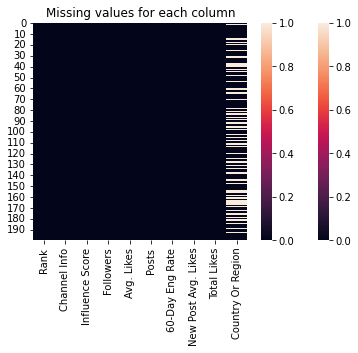

In [19]:
#c Plot a heatmap of the missing values in the dataset.
sns.heatmap(dataset.isnull())
plt.title("Missing values for each column")
sns.heatmap(dataset.isnull())
plt.show()

In [21]:
#d Find the number of outliers in each numeric column and remove them.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = dataset.select_dtypes(include=numerics)
numeric_df

,Rank,Influence Score,60-Day Eng Rate
0,1,92,0.013
1,2,91,0.014
2,3,90,0.010
3,4,93,0.005
4,5,91,0.003
...,...,...,...
195,196,63,0.009
196,197,84,0.064
197,198,80,0.003
198,199,79,0.003


In [22]:
categorical_df = dataset.select_dtypes(include='object')
categorical_df

,Followers,Avg. Likes,Posts,New Post Avg. Likes,Total Likes,Country Or Region
0,485.2m,8.7m,3.4k,6.3m,29.1b,Spain
1,370.7m,8.2m,7.0k,5.0m,57.4b,United States
2,363.9m,6.7m,915,3.5m,6.1b,NaN
3,348.8m,6.1m,1.9k,1.7m,11.4b,United States
4,339.4m,1.8m,6.8k,932.0k,12.6b,United States
...,...,...,...,...,...,...
195,33.6m,680.6k,4.6k,305.7k,3.1b,Russia
196,33.6m,2.2m,1.4k,2.1m,3.0b,Canada
197,33.6m,227.8k,4.2k,103.2k,955.9m,Indonesia
198,33.5m,193.3k,865,82.6k,167.2m,Brazil


In [24]:
for (columnName, columnData) in numeric_df.iteritems():
   avg = columnData.mean()
   std_dev = columnData.std()
   print('Column Name : ', columnName)

   print('Number of Outliers : ',((columnData < (avg - 2 * std_dev)) |(columnData > (avg + 2 * std_dev))).sum())
   print(".......................")

Column Name :  Rank
Number of Outliers :  0
.......................
Column Name :  Influence Score
Number of Outliers :  8
.......................
Column Name :  60-Day Eng Rate
Number of Outliers :  9
.......................


In [25]:
avg = numeric_df.mean()
std_dev = numeric_df.std()
outlier_df = ((numeric_df < (avg - 2 * std_dev)) |(numeric_df > (avg + 2 * std_dev)))
outlier_df

,Rank,Influence Score,60-Day Eng Rate
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
195,False,True,False
196,False,False,False
197,False,False,False
198,False,False,False


In [26]:
final_df = pd.concat([categorical_df, outlier_df], axis=1)
outliers_in_rows = []
for index,row in outlier_df.iterrows():
   outliers_in_rows.append(row.sum())

print(len(outliers_in_rows))

200


In [27]:
#creating new column with the name value
final_df['value'] = outliers_in_rows
final_df_without_outliers= final_df.loc[final_df['value'] == 0]
print(final_df_without_outliers.shape)

(183, 10)


In [28]:
final_df_without_outliers.head()

,Followers,Avg. Likes,Posts,New Post Avg. Likes,Total Likes,Country Or Region,Rank,Influence Score,60-Day Eng Rate,value
0,485.2m,8.7m,3.4k,6.3m,29.1b,Spain,False,False,False,0
1,370.7m,8.2m,7.0k,5.0m,57.4b,United States,False,False,False,0
2,363.9m,6.7m,915,3.5m,6.1b,NaN,False,False,False,0
3,348.8m,6.1m,1.9k,1.7m,11.4b,United States,False,False,False,0
4,339.4m,1.8m,6.8k,932.0k,12.6b,United States,False,False,False,0


In [30]:
final_df_outliers = final_df.loc[final_df['value'] != 0]
arr = []
for i,r in final_df_outliers.iterrows():
   arr.append(i)
df_without_outliers = dataset.drop(dataset.index[arr])

In [31]:
df_without_outliers.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,35,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,199,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,101,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,158,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,175,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [32]:
total_missing_values = df_without_outliers.isnull().sum()
missing_values_per_column = df_without_outliers.isnull().sum()/df_without_outliers.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per_column], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
print(null_values)

                     total_null  total_null_perc
Country Or Region            54         0.295082
Rank                          0         0.000000
Channel Info                  0         0.000000
Influence Score               0         0.000000
Followers                     0         0.000000
Avg. Likes                    0         0.000000
Posts                         0         0.000000
60-Day Eng Rate               0         0.000000
New Post Avg. Likes           0         0.000000
Total Likes                   0         0.000000


In [33]:
NA_val = df_without_outliers.isna().sum();
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_without_outliers.shape[0] < threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df_without_outliers[na_filter(NA_val)]
print(df_cleaned.columns)

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')


In [34]:
print(len(df_without_outliers.columns),len(df_cleaned.columns))

10 10


In [37]:
print(df_cleaned.isnull().sum())

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      54
dtype: int64


In [38]:
df_cleaned=df_cleaned.dropna().reset_index()

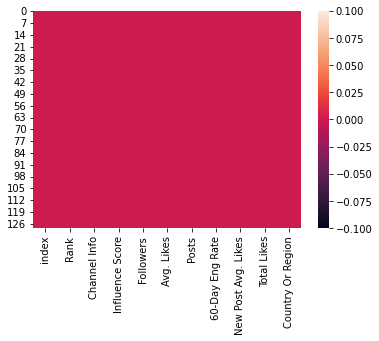

In [39]:
sns.heatmap(df_cleaned.isnull());

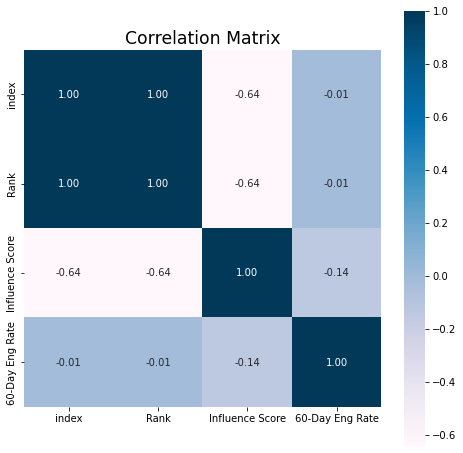

In [40]:
#Find the attributes with the highest correlation coefficient.
dataCorr = df_cleaned.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix', fontsize="xx-large")
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'PuBu')
plt.show()

In [43]:
#VISUALISING THE DATA

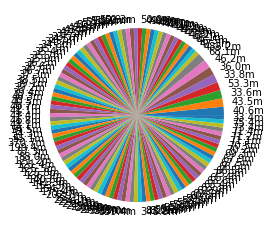

In [45]:
#Pie chart of the no of followers
df_cleaned['Followers'].value_counts().plot(kind='pie')

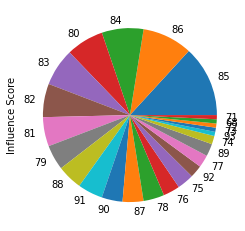

In [47]:
#Pie chart of the influence score
df_cleaned['Influence Score'].value_counts().plot(kind='pie')

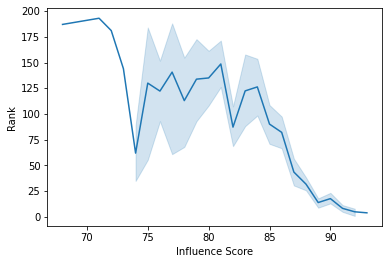

In [49]:
#Lineplot
sns.lineplot(x="Influence Score", y="Rank", data=df_cleaned)

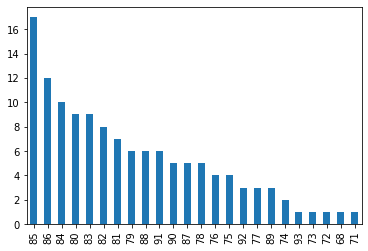

In [50]:
#Barplot 
df_cleaned['Influence Score'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


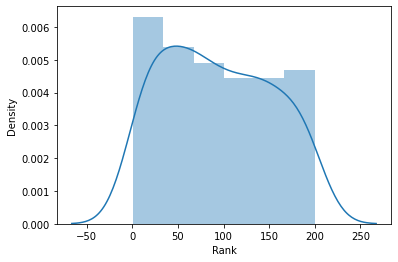

In [51]:
#Distplot 
sns.distplot(df_cleaned['Rank'])